In [7]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
%matplotlib inline

In [2]:
# load results
#results = pickle.load( open( "results_exp_mnist_low_sample.p", "rb" ) )
# if the file is saved from python 2
results = pickle.load(open("results_exp_mnist_full.p", "rb"), encoding='latin1')
deltalist = results[0]
powerlist = results[1]
powerlist_oracle = results[2]

cdflist = results[3]
cdflist_oracle = results[4]

powerlist_x = results[5]
cdflist_x = results[6]

powerlistT = np.array(powerlist).T

print(powerlistT)

print(powerlist_x)

[[ 0.022  0.128  0.332  0.208  0.598  0.162  0.644  0.49   0.502  0.8  ]
 [ 0.026  0.12   0.336  0.206  0.806  0.71   0.81   0.614  0.692  0.806]
 [ 0.046  0.104  0.252  0.204  0.778  0.746  0.716  0.888  0.878  0.964]
 [ 0.058  0.08   0.294  0.208  0.724  0.88   0.846  0.904  0.81   0.976]
 [ 0.048  0.076  0.302  0.262  0.774  0.672  0.866  0.972  0.866  0.982]]
[0.02, 0.089999999999999997, 0.060000000000000005, 0.13, 0.14000000000000001, 0.26000000000000001, 0.23000000000000001, 0.38, 0.12, 0.28000000000000003]


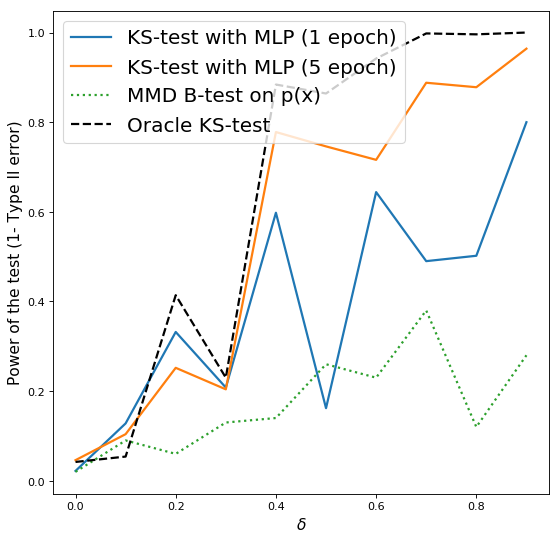

In [21]:
#plot figures
fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

num_epoch = 1
legendslist=[]
# plot the comparison
for ind,item in enumerate(powerlistT):
    if ind ==0 or ind ==2:
        plt.plot(deltalist,item,linewidth=2)
        legendslist.append('KS-test with MLP ('+repr(num_epoch)+' epoch)')
    num_epoch += 2
    


plt.plot(deltalist,powerlist_x,linewidth=2,linestyle=':')
plt.plot(deltalist,powerlist_oracle,linewidth=2, color='k',linestyle='--')

legendslist.append('MMD B-test on p(x)')
legendslist.append('Oracle KS-test')
plt.xlabel('$\delta$', fontsize=14)
plt.ylabel('Power of the test (1- Type II error)',fontsize=14)
plt.legend(legendslist, loc='best',fontsize=18)

#plt.title('Comparing the power at 0.05 level of significance',fontsize=14)

plt.show()

fig.savefig("Hypothesis-Testing-power-as-we-train-more.pdf", bbox_inches='tight')

In [4]:
# plot the QQ-plot for different levels

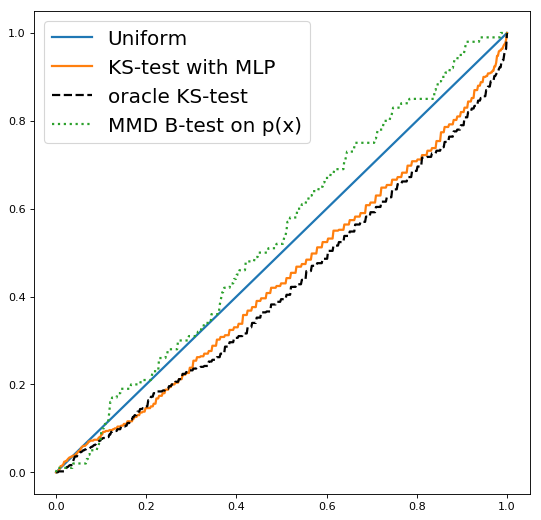

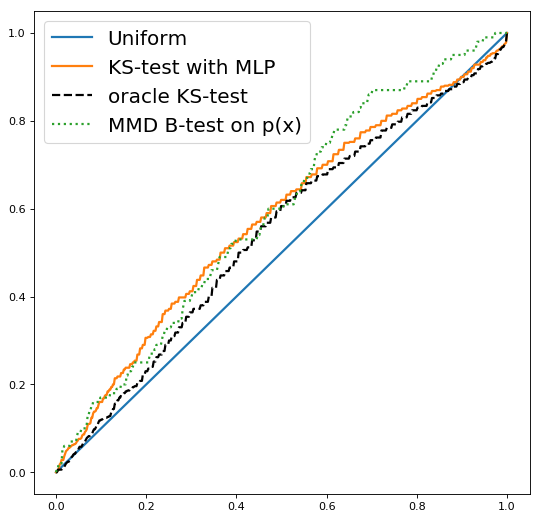

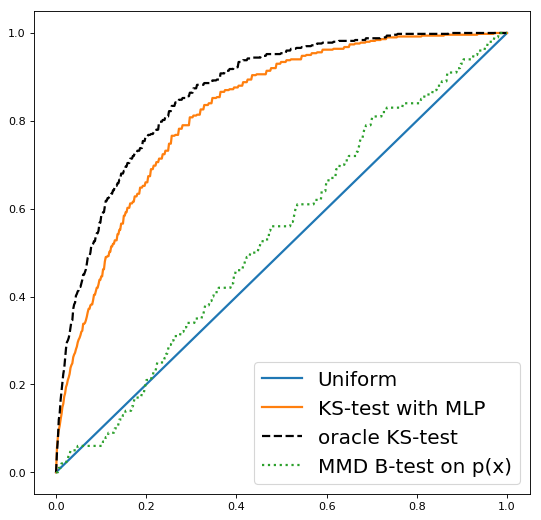

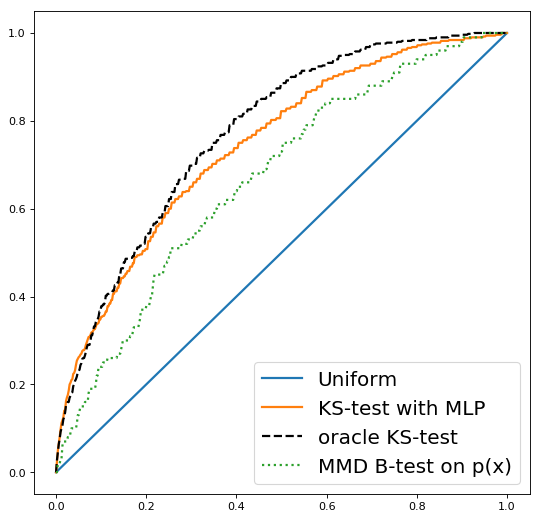

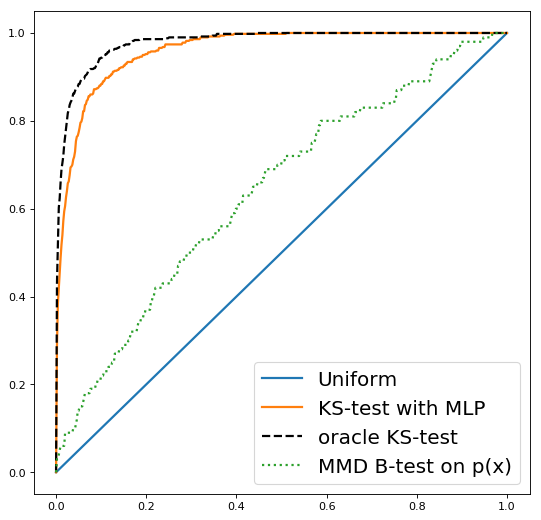

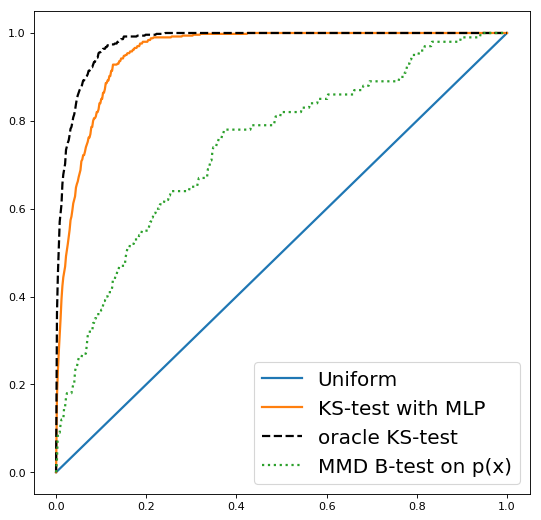

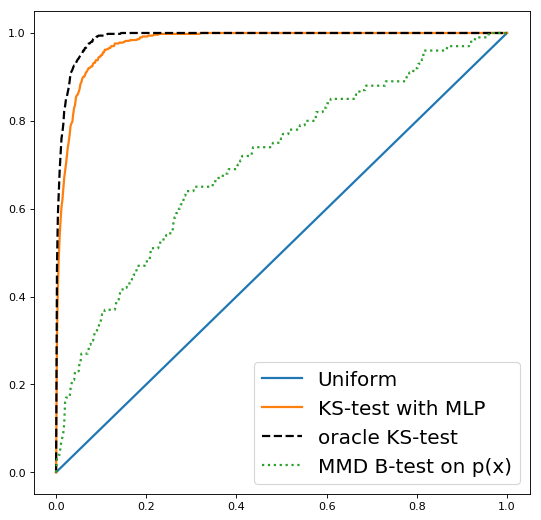

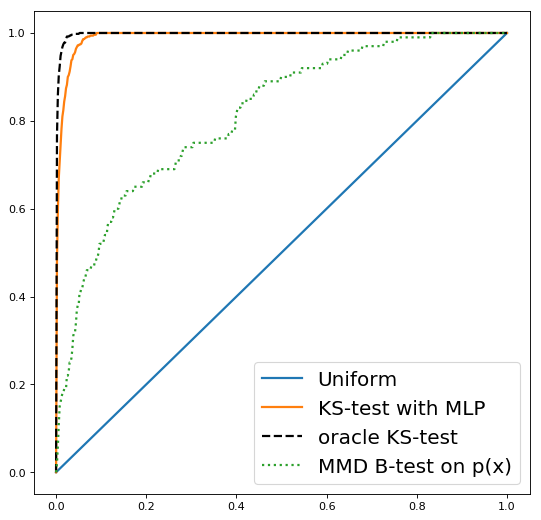

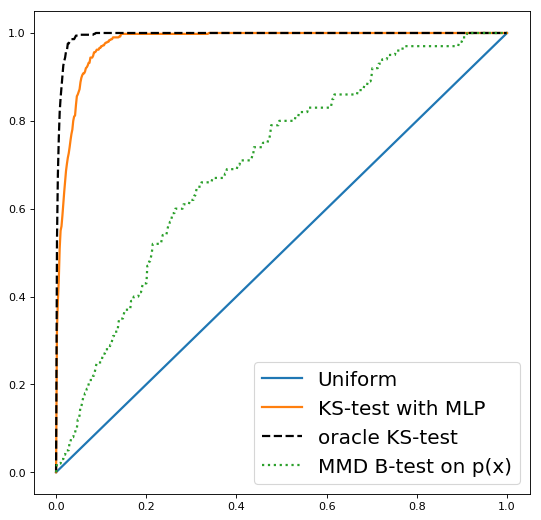

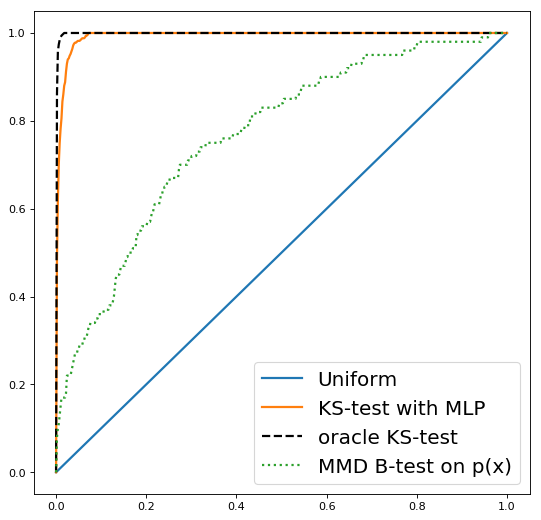

In [22]:
for (delta,item1,item2,item3) in zip(deltalist,cdflist,cdflist_oracle,cdflist_x):
    fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    
    delta = int(delta*10)
    xx=  np.linspace(0, 1, num=500)

    cdfpval = item1
    cdfpval_gnd = item2
    cdfpval_x = item3
    plt.plot(xx, xx,linewidth=2)
    plt.plot(xx, cdfpval(xx),linewidth=2)
    plt.plot(xx, cdfpval_gnd(xx),linewidth=2,color='k',linestyle='--')
    plt.plot(xx, cdfpval_x(xx),linewidth=2,linestyle=':')

    plt.legend(['Uniform', 'KS-test with MLP', 'oracle KS-test','MMD B-test on p(x)'], loc='best',fontsize=18)
    #plt.title('CDF of p-values', fontsize=18)
    fig.savefig("Hypothesis-Testing"+"delta-0"+repr(delta)+".pdf", bbox_inches='tight')

In [152]:
exp_name = 'BoostQnoProb'
nlen =4 # set to smaller than 5 if the 8000 experiments are not over.

results = pickle.load(open("results_exp_benchmarking_"+exp_name+".p", "rb"), encoding='latin1')
#results_exp_benchmarking_jan30_badpred
#ToPickle = [alpha_range, nlist, num_runs, methods_name, allresults]
#allresults[(alpha,n)].append([results,p_P,p_Q])
#results are {"acc_list": acc_list, "wt_list": wt_list}
# acc_list.append([acc_weighted,C,Cp])

alpha_range = results[0]
nlist = results[1]
num_runs = results[2]

methods_name = results[3]
allresults = results[4]

if len(results) > 5:
    methods_name_fast = results[5]
    num_runs_slow = results[6]
else:
    methods_name_fast = methods_name
    num_runs_slow = num_runs

MSE_vs_n = {}
STD_vs_n = {}

ACC_vs_n = {}
ACCSTD_vs_n = {}

RELACC_vs_n = {}
RELACCSTD_vs_n = {}


for alpha in alpha_range:
    for name in methods_name:
        MSE_vs_n[(alpha,name)] = []
        STD_vs_n[(alpha,name)] = []
        ACC_vs_n[(alpha,name)] = []
        ACCSTD_vs_n[(alpha,name)] = []
        RELACC_vs_n[(alpha,name)] = []
        RELACCSTD_vs_n[(alpha,name)] = []
    for n in nlist[:nlen]:
        tmp = allresults[(alpha,n)]
        print(n)
        
        rep_data={}
        for name in methods_name:
            rep_data[("estimation",name)] = []
            rep_data[("testacc",name)] = []
            rep_data[("relacc",name)] = []
            
        for i,exp_results in enumerate(tmp): # enumerate over repeats
                           
            p_P = exp_results[1]
            p_Q = exp_results[2]
            w0 = np.array(p_Q)/np.array(p_P)
            tmp1 = exp_results[0]
            wt_list = tmp1["wt_list"]
            acc_list = tmp1["acc_list"]
            if i >= num_runs_slow:
                methods_name_cur  = methods_name_fast
            else:
                methods_name_cur = methods_name
            for (wt,acc,name) in zip(wt_list,acc_list,methods_name_cur):
                if name is not None:
                    rep_data[("estimation",name)].append(np.sum((wt-w0)**2))
                    rep_data[("testacc",name)].append(acc[0])
                    rep_data[("relacc",name)].append(acc[0]-acc_list[0][0])
                    print(name, " MSE", np.sum((wt-w0)**2), "ACC", acc[0],
                          "relacc", acc[0]-acc_list[0][0])
        for name in methods_name:
            MSE_vs_n[(alpha,name)].append(np.mean(np.array(rep_data[("estimation",name)])))
            STD_vs_n[(alpha,name)].append(np.std(np.array(rep_data[("estimation",name)]))/np.sqrt(num_runs_slow))
            ACC_vs_n[(alpha,name)].append(np.mean(np.array(rep_data[("testacc",name)])))
            ACCSTD_vs_n[(alpha,name)].append(np.std(np.array(rep_data[("testacc",name)]))/np.sqrt(num_runs_slow))
            RELACC_vs_n[(alpha,name)].append(np.mean(np.array(rep_data[("relacc",name)])))
            RELACCSTD_vs_n[(alpha,name)].append(np.std(np.array(rep_data[("relacc",name)]))/np.sqrt(num_runs_slow))
        for name in methods_name_fast:
            STD_vs_n[(alpha,name)] =[item*np.sqrt(num_runs_slow)/np.sqrt(num_runs) for item in STD_vs_n[(alpha,name)]]
            ACCSTD_vs_n[(alpha,name)] =[item*np.sqrt(num_runs_slow)/np.sqrt(num_runs) for item in ACCSTD_vs_n[(alpha,name)]]
            RELACCSTD_vs_n[(alpha,name)] =[item*np.sqrt(num_runs_slow)/np.sqrt(num_runs) for item in RELACCSTD_vs_n[(alpha,name)]]




500
unweighted  MSE 71.11111111111113 ACC 0.7128906 relacc 0.0
BBSE  MSE 12.063196516513546 ACC 0.8925781 relacc 0.1796875
KMM-Tars  MSE 1.7175929169054156 ACC 0.875 relacc 0.16210938
unweighted  MSE 71.11111111111113 ACC 0.79296875 relacc 0.0
BBSE  MSE 13.809433555402071 ACC 0.8417969 relacc 0.048828125
KMM-Tars  MSE 1.589048649169131 ACC 0.8183594 relacc 0.025390625
unweighted  MSE 71.11111111111113 ACC 0.79296875 relacc 0.0
BBSE  MSE 16.93663574815402 ACC 0.88671875 relacc 0.09375
KMM-Tars  MSE 5.8098392501187295 ACC 0.84765625 relacc 0.0546875
unweighted  MSE 71.11111111111113 ACC 0.77734375 relacc 0.0
BBSE  MSE 23.45358822651164 ACC 0.7890625 relacc 0.01171875
KMM-Tars  MSE 13.141590740824483 ACC 0.8378906 relacc 0.060546875
unweighted  MSE 71.11111111111113 ACC 0.7597656 relacc 0.0
BBSE  MSE 14.08493486482622 ACC 0.875 relacc 0.115234375
KMM-Tars  MSE 3.941865749943484 ACC 0.8652344 relacc 0.10546875
unweighted  MSE 71.11111111111113 ACC 0.796875 relacc 0.0
BBSE  MSE 17.528637973

unweighted  MSE 39.999999999999986 ACC 0.79296875 relacc 0.0
BBSE  MSE 14.013674912250245 ACC 0.8769531 relacc 0.083984375
1000
unweighted  MSE 39.999999999999986 ACC 0.8378906 relacc 0.0
BBSE  MSE 3.6719684069691287 ACC 0.88183594 relacc 0.043945312
KMM-Tars  MSE 3.7868829155568617 ACC 0.86621094 relacc 0.028320312
unweighted  MSE 39.999999999999986 ACC 0.8408203 relacc 0.0
BBSE  MSE 5.518614097155707 ACC 0.8769531 relacc 0.036132812
KMM-Tars  MSE 1.7611144090657642 ACC 0.86328125 relacc 0.022460938
unweighted  MSE 39.999999999999986 ACC 0.83496094 relacc 0.0
BBSE  MSE 2.728309727675298 ACC 0.88183594 relacc 0.046875
KMM-Tars  MSE 1.049206720367981 ACC 0.8544922 relacc 0.01953125
unweighted  MSE 39.999999999999986 ACC 0.83203125 relacc 0.0
BBSE  MSE 3.199208199085191 ACC 0.8486328 relacc 0.016601562
KMM-Tars  MSE 3.0277059592883013 ACC 0.8173828 relacc -0.0146484375
unweighted  MSE 39.999999999999986 ACC 0.8574219 relacc 0.0
BBSE  MSE 3.0048173329380305 ACC 0.8779297 relacc 0.02050781

unweighted  MSE 17.777777777777782 ACC 0.7890625 relacc 0.0
BBSE  MSE 5.64173843430406 ACC 0.78515625 relacc -0.00390625
1000
unweighted  MSE 17.777777777777782 ACC 0.82910156 relacc 0.0
BBSE  MSE 2.1881703675415825 ACC 0.84472656 relacc 0.015625
KMM-Tars  MSE 1.1330205826963873 ACC 0.86816406 relacc 0.0390625
unweighted  MSE 17.777777777777782 ACC 0.9013672 relacc 0.0
BBSE  MSE 0.6967127734990575 ACC 0.8857422 relacc -0.015625
KMM-Tars  MSE 0.330375994826715 ACC 0.8925781 relacc -0.0087890625
unweighted  MSE 17.777777777777782 ACC 0.8623047 relacc 0.0
BBSE  MSE 1.461949518202109 ACC 0.88671875 relacc 0.024414062
KMM-Tars  MSE 1.234875467706318 ACC 0.88671875 relacc 0.024414062
unweighted  MSE 17.777777777777782 ACC 0.8623047 relacc 0.0
BBSE  MSE 2.141759893675769 ACC 0.8496094 relacc -0.0126953125
KMM-Tars  MSE 1.1576482499113996 ACC 0.82128906 relacc -0.041015625
unweighted  MSE 17.777777777777782 ACC 0.859375 relacc 0.0
BBSE  MSE 1.986706267296384 ACC 0.8876953 relacc 0.028320312
KM

BBSE  MSE 2.0358187112595583 ACC 0.8203125 relacc -0.03515625
unweighted  MSE 4.444444444444444 ACC 0.8691406 relacc 0.0
BBSE  MSE 1.8205854507597672 ACC 0.87890625 relacc 0.009765625
unweighted  MSE 4.444444444444444 ACC 0.8496094 relacc 0.0
BBSE  MSE 1.6331800554329605 ACC 0.84375 relacc -0.005859375
unweighted  MSE 4.444444444444444 ACC 0.7949219 relacc 0.0
BBSE  MSE 2.1588276695664503 ACC 0.8203125 relacc 0.025390625
1000
unweighted  MSE 4.444444444444444 ACC 0.7861328 relacc 0.0
BBSE  MSE 0.6043165002884514 ACC 0.8544922 relacc 0.068359375
KMM-Tars  MSE 1.2034399948978802 ACC 0.8564453 relacc 0.0703125
unweighted  MSE 4.444444444444444 ACC 0.86816406 relacc 0.0
BBSE  MSE 1.010749959757074 ACC 0.85058594 relacc -0.017578125
KMM-Tars  MSE 1.2975833590882395 ACC 0.8642578 relacc -0.00390625
unweighted  MSE 4.444444444444444 ACC 0.8564453 relacc 0.0
BBSE  MSE 0.7376208594225192 ACC 0.8515625 relacc -0.0048828125
KMM-Tars  MSE 0.6634210094132272 ACC 0.8691406 relacc 0.0126953125
unweig

unweighted  MSE 0.0 ACC 0.828125 relacc 0.0
BBSE  MSE 1.1304199021549386 ACC 0.8144531 relacc -0.013671875
unweighted  MSE 0.0 ACC 0.8535156 relacc 0.0
BBSE  MSE 0.9747092077537994 ACC 0.8613281 relacc 0.0078125
unweighted  MSE 0.0 ACC 0.87890625 relacc 0.0
BBSE  MSE 0.9451475417193909 ACC 0.85546875 relacc -0.0234375
unweighted  MSE 0.0 ACC 0.8769531 relacc 0.0
BBSE  MSE 1.0614331486425432 ACC 0.87109375 relacc -0.005859375
unweighted  MSE 0.0 ACC 0.875 relacc 0.0
BBSE  MSE 0.9234373582859186 ACC 0.8613281 relacc -0.013671875
unweighted  MSE 0.0 ACC 0.8808594 relacc 0.0
BBSE  MSE 1.0069601062110793 ACC 0.8613281 relacc -0.01953125
1000
unweighted  MSE 0.0 ACC 0.8955078 relacc 0.0
BBSE  MSE 0.3660452646617569 ACC 0.8769531 relacc -0.018554688
KMM-Tars  MSE 0.29761392156353217 ACC 0.8769531 relacc -0.018554688
unweighted  MSE 0.0 ACC 0.89160156 relacc 0.0
BBSE  MSE 0.38064992866311514 ACC 0.8798828 relacc -0.01171875
KMM-Tars  MSE 0.19904258748866166 ACC 0.88183594 relacc -0.009765625
u

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


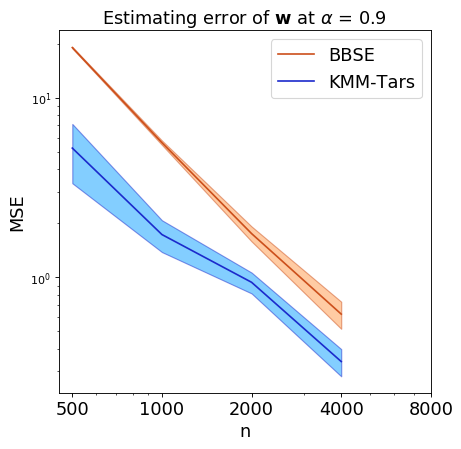

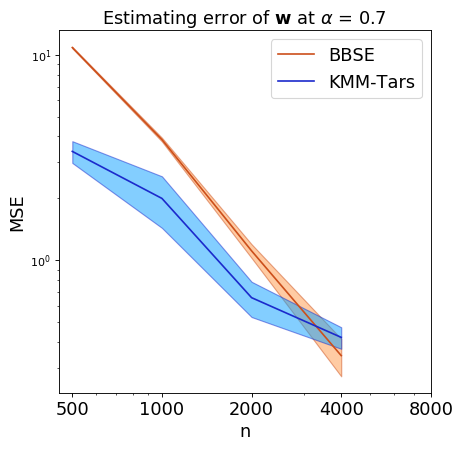

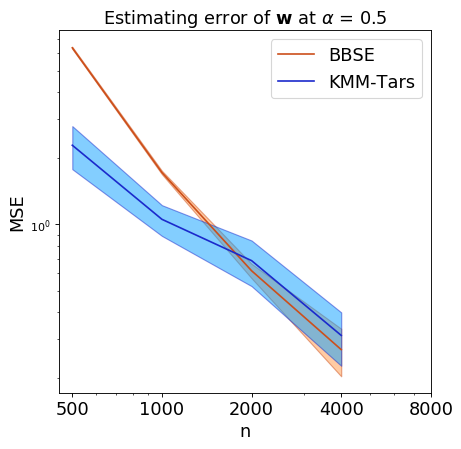

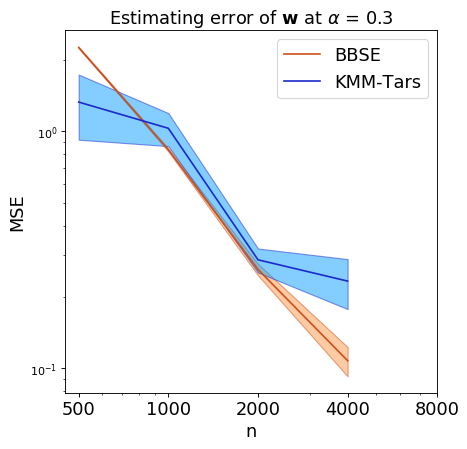

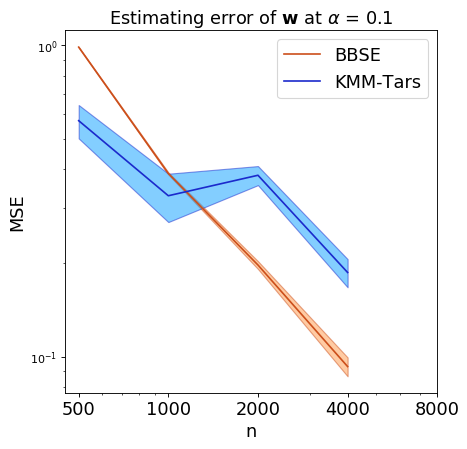

In [153]:
colorlist=['#CC4F1B','#1B2ACC','#3F7F4C']
facecolorlist =['#FF9848','#089FFF','#7EFF99']
for alpha in alpha_range:
    plt.clf()
    fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.hold(1)
    
    x=nlist[:nlen];
    for i,name in enumerate(methods_name):
        if i==0:
            continue
        y=np.array(MSE_vs_n[(alpha,name)])
        error = np.array(STD_vs_n[(alpha,name)])
        plt.plot(x, y, 'k', color=colorlist[i-1])
        plt.fill_between(x, y-error, y+error,
            alpha=0.5, edgecolor=colorlist[i-1], facecolor=facecolorlist[i-1])
    
    plt.legend(methods_name[1:],fontsize=16)
    plt.xlabel("n", fontsize=16)  
    plt.ylabel("MSE", fontsize=16)
    plt.xscale('log')
    plt.xticks(nlist,nlist,fontsize=16)
    plt.yscale('log')
    plt.title(r"Estimating error of $\mathbf{w}$ at $\alpha$ = "+repr(alpha), fontsize=16)
    plt.show()
    fig.savefig("figures/"+exp_name+"_estimation_alpha_"+repr(alpha)+".pdf", bbox_inches='tight')


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


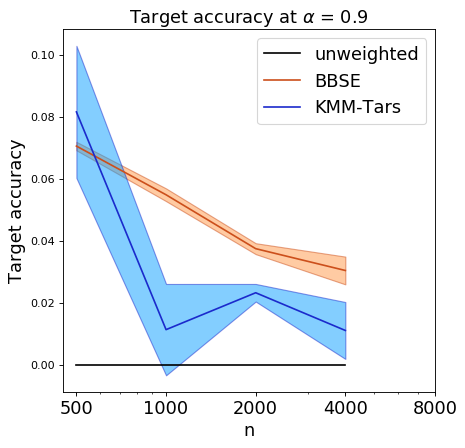

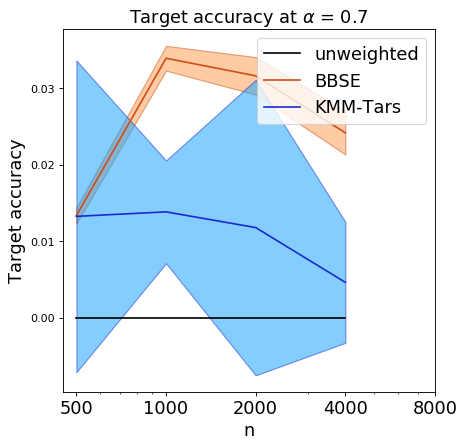

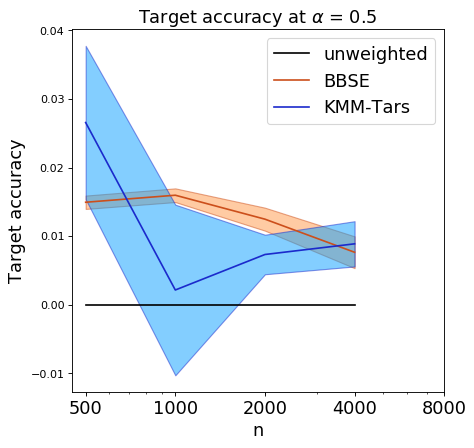

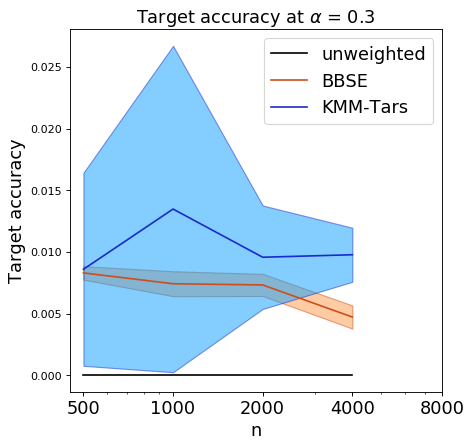

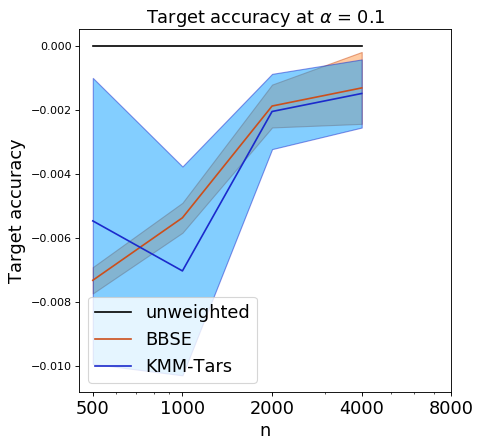

In [154]:
colorlist=['#CC4F1B','#1B2ACC','#3F7F4C']
facecolorlist =['#FF9848','#089FFF','#7EFF99']
for alpha in alpha_range:
    plt.clf()
    fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.hold(1)
    
    x=nlist[:nlen];
    
    # plot the baseline
    y=np.array(RELACC_vs_n[(alpha,methods_name[0])])
    error = np.array(RELACCSTD_vs_n[(alpha,methods_name[0])])
    plt.plot(x, y, 'k')
    plt.fill_between(x, y-error, y+error,
                     alpha=0.5)
    
    # plot the relative improvements
    for i,name in enumerate(methods_name):
        if i==0:
            continue
        y=np.array(RELACC_vs_n[(alpha,name)])
        error = np.array(RELACCSTD_vs_n[(alpha,name)])
        plt.plot(x, y, 'k', color=colorlist[i-1])
        plt.fill_between(x, y-error, y+error,
            alpha=0.5, edgecolor=colorlist[i-1], facecolor=facecolorlist[i-1])

    
    plt.legend(methods_name,fontsize=16)
    plt.xlabel("n", fontsize=16)  
    plt.ylabel("Target accuracy", fontsize=16)
    plt.xscale('log')
    plt.xticks(nlist,nlist,fontsize=16)
    #plt.yscale('log')
    plt.title(r"Target accuracy at $\alpha$ = "+repr(alpha), fontsize=16)
    plt.show()
    fig.savefig("figures/"+exp_name+"_relativeACC_"+repr(alpha)+".pdf", bbox_inches='tight')


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


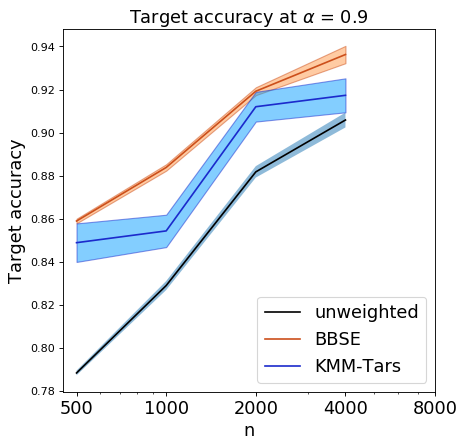

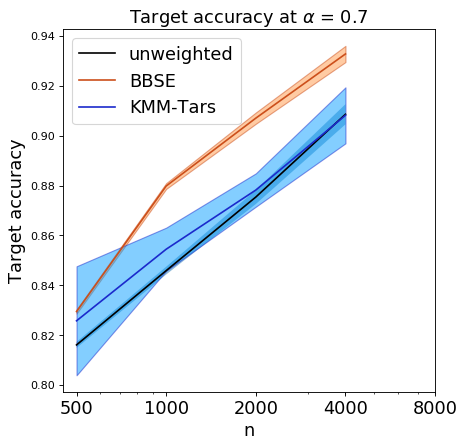

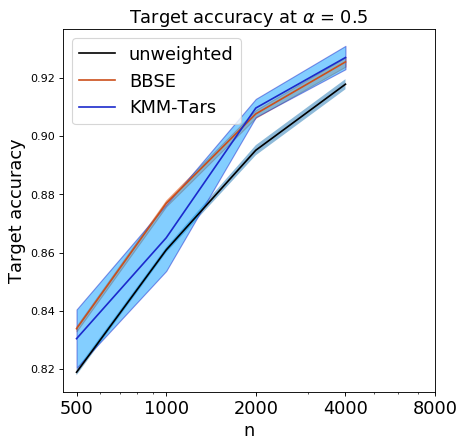

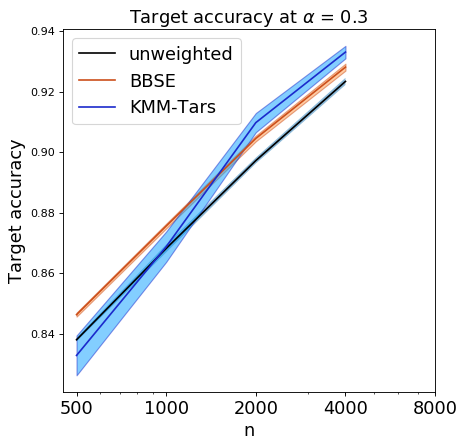

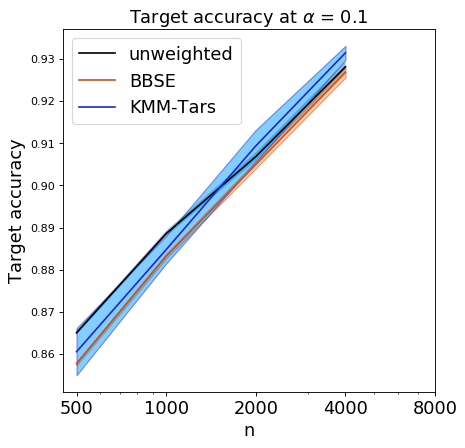

In [155]:
colorlist=['#CC4F1B','#1B2ACC','#3F7F4C']
facecolorlist =['#FF9848','#089FFF','#7EFF99']
for alpha in alpha_range:
    plt.clf()
    fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.hold(1)
    
    x=nlist[:nlen];
    
    # plot the baseline
    y=np.array(ACC_vs_n[(alpha,methods_name[0])])
    error = np.array(ACCSTD_vs_n[(alpha,methods_name[0])])
    plt.plot(x, y, 'k')
    plt.fill_between(x, y-error, y+error,
                     alpha=0.5)
    
    # plot the relative improvements
    for i,name in enumerate(methods_name):
        if i==0:
            continue
        y=np.array(ACC_vs_n[(alpha,name)])
        error = np.array(ACCSTD_vs_n[(alpha,name)])
        plt.plot(x, y, 'k', color=colorlist[i-1])
        plt.fill_between(x, y-error, y+error,
            alpha=0.5, edgecolor=colorlist[i-1], facecolor=facecolorlist[i-1])

    
    plt.legend(methods_name,fontsize=16)
    plt.xlabel("n", fontsize=16)  
    plt.ylabel("Target accuracy", fontsize=16)
    plt.xscale('log')
    plt.xticks(nlist,nlist,fontsize=16)
    #plt.yscale('log')
    plt.title(r"Target accuracy at $\alpha$ = "+repr(alpha), fontsize=16)
    plt.show()
    fig.savefig("figures/"+exp_name+"_ACC_"+repr(alpha)+".pdf", bbox_inches='tight')